<a href="https://colab.research.google.com/github/akshath658/akshath658/blob/main/Super_Market_Sales_20211CEI0145.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
d=pd.read_csv('/content/supermarket_sales.csv')
d

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df0=d.drop(['Invoice ID','Product_line','Date','Time','Payment','cogs','gross_margin_percentage','gross_income','Rating'], axis=1)
df0

,Branch,City,Customer_type,Gender,Unit_price,Quantity,Tax_5%,Total
0,A,Yangon,Member,Female,74.69,7,26.1415,548.9715
1,C,Naypyitaw,Normal,Female,15.28,5,3.8200,80.2200
2,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255
3,A,Yangon,Member,Male,58.22,8,23.2880,489.0480
4,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785
...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,40.35,1,2.0175,42.3675
996,B,Mandalay,Normal,Female,97.38,10,48.6900,1022.4900
997,A,Yangon,Member,Male,31.84,1,1.5920,33.4320
998,A,Yangon,Normal,Male,65.82,1,3.2910,69.1110


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer_type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Unit_price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Tax_5%         1000 non-null   float64
 7   Total          1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
df0.describe()

,Unit_price,Quantity,Tax_5%,Total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749
std,26.494628,2.923431,11.708825,245.885335
min,10.080000,1.000000,0.508500,10.678500
25%,32.875000,3.000000,5.924875,124.422375
50%,55.230000,5.000000,12.088000,253.848000
75%,77.935000,8.000000,22.445250,471.350250
max,99.960000,10.000000,49.650000,1042.650000


In [ ]:
df0.columns

Index(['Branch', 'City', 'Customer_type', 'Gender', 'Unit_price', 'Quantity',
       'Tax_5%', 'Total'],
      dtype='object')

In [ ]:
print(df0.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Branch   City  Customer_type  Gender  Unit_price  Quantity  Tax_5%  Total
0     False  False          False   False       False     False   False  False
1     False  False          False   False       False     False   False  False
2     False  False          False   False       False     False   False  False
3     False  False          False   False       False     False   False  False
4     False  False          False   False       False     False   False  False
..      ...    ...            ...     ...         ...       ...     ...    ...
995   False  False          False   False       False     False   False  False
996   False  False          False   False       False     False   False  False
997   False  False          False   False       False     False   False  False
998   False  False          False   False       False     False   False  False
999   False  False          False   False       False     False   Fal

In [ ]:
#Return Data Frame with no empty cells:
df0=df0.dropna()

In [ ]:
#Checking if there are any duplicate values in Data Set( it means same data consisting in two different rows)
print(df0.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [ ]:
#The corr() method calculates the relationship between each column in your data set
df0.corr()

<ipython-input-10-7aaa8976c3a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr()


,Unit_price,Quantity,Tax_5%,Total
Unit_price,1.000000,0.010778,0.633962,0.633962
Quantity,0.010778,1.000000,0.705510,0.705510
Tax_5%,0.633962,0.705510,1.000000,1.000000
Total,0.633962,0.705510,1.000000,1.000000


In [ ]:
categorical_columns = [cname for cname in df0.columns if df0[cname].dtype == "object"]
categorical_columns

['Branch', 'City', 'Customer_type', 'Gender']

In [ ]:
df0['Gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True) #transforming

In [ ]:
df=df0.head(10)
df

,Branch,City,Customer_type,Gender,Unit_price,Quantity,Tax_5%,Total
0,A,Yangon,Member,0,74.69,7,26.1415,548.9715
1,C,Naypyitaw,Normal,0,15.28,5,3.8200,80.2200
2,A,Yangon,Normal,1,46.33,7,16.2155,340.5255
3,A,Yangon,Member,1,58.22,8,23.2880,489.0480
4,A,Yangon,Normal,1,86.31,7,30.2085,634.3785
5,C,Naypyitaw,Normal,1,85.39,7,29.8865,627.6165
6,A,Yangon,Member,0,68.84,6,20.6520,433.6920
7,C,Naypyitaw,Normal,0,73.56,10,36.7800,772.3800
8,A,Yangon,Member,0,36.26,2,3.6260,76.1460
9,B,Mandalay,Member,0,54.84,3,8.2260,172.7460


In [ ]:
df1=df['Unit_price']
df2=df['Total']
df3=df['Quantity']

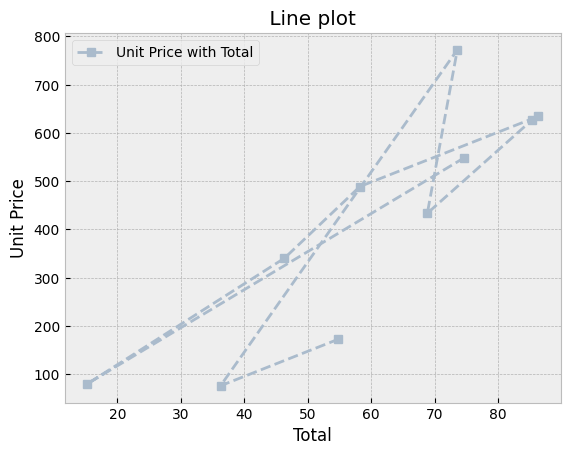

In [ ]:
#1.Plot the line plot between unit price and total.
plt.style.use('bmh') #to change the style
plt.plot(df1,df2,label="Unit Price with Total",marker='s',linestyle='--',color='#AABBCC')
plt.title(" Line plot ")
plt.xlabel("Total")
plt.ylabel("Unit Price")
plt.legend() #plot the legend
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

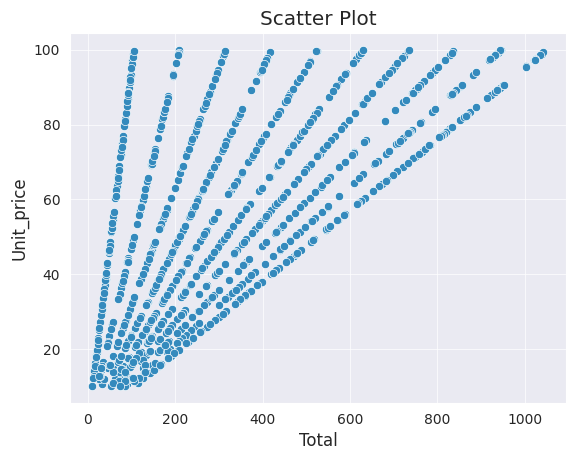

In [ ]:
#2.Plot the scatter plot between unit price and total.
#df0.plot.scatter(x = 'Total', y = 'Unit_price', s = 100)
sns.scatterplot(x="Total",y="Unit_price",data=df0).set_title("Scatter Plot")
#Sct_plt=sns.scatterplot(x="Total",y="Unit_price",hue="Gender",data=df0).set_title("Scatter Plot")

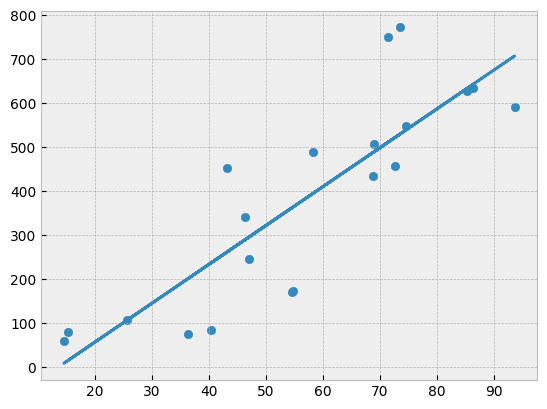

In [ ]:
#3.Plot a linear regression illustrating the linear relationship between Unit price and Quantity.
from scipy import stats
d=df0.head(20)
d1=d['Unit_price']
d2=d['Total']
x = d1
y = d2

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Text(0, 0.5, 'Total Count')

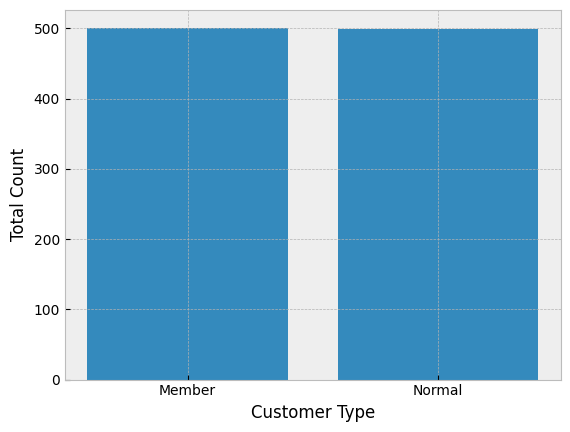

In [ ]:
#4.Plot the bar graph for the number of male and female in the super market.
from collections import Counter
Customer= df0['Customer_type']
Customer_counter = Counter()
for response in Customer:
  Customer_counter.update(response.split())
Customer_counter.most_common(2)
Customer= []
Total = []

for item in Customer_counter.most_common(2):
  Customer.append(item[0])
  Total.append(item[1])
plt.bar(Customer,Total)
plt.xlabel("Customer Type")
plt.ylabel("Total Count")


Member    501
Normal    499
Name: Customer_type, dtype: int64


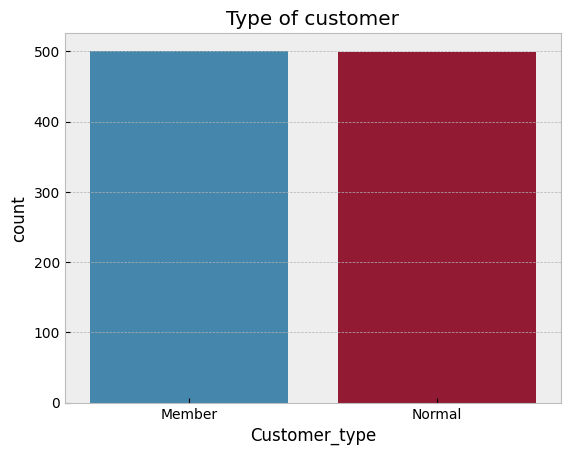

In [ ]:
#5.Plot the bar graph for the number of member customer  and normal customer
sns.countplot(x="Customer_type", data =df0).set_title("Type of customer")
print(df0['Customer_type'].value_counts())

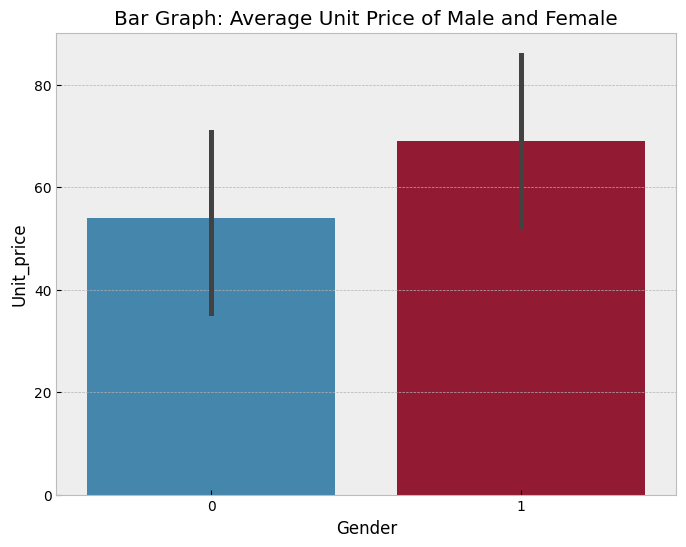

In [ ]:
#6.Plot the bar graph for the  average of  Unit price of male and female
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Unit_price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Bar Graph: Average Unit Price of Male and Female')
plt.show()

Text(0.5, 1.0, 'Box Plot')

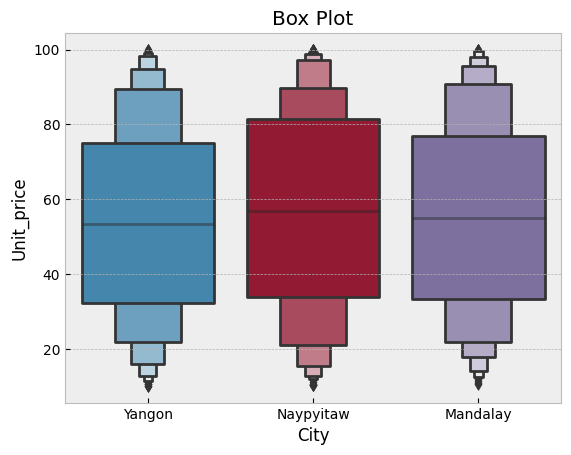

In [ ]:
#7.Plot the distributions of unit price of different city using box plot.
sns.boxenplot(y = 'Unit_price', x = 'City', data=df0 ).set_title("Box Plot")

Text(0.5, 1.0, 'Swarm Plot')

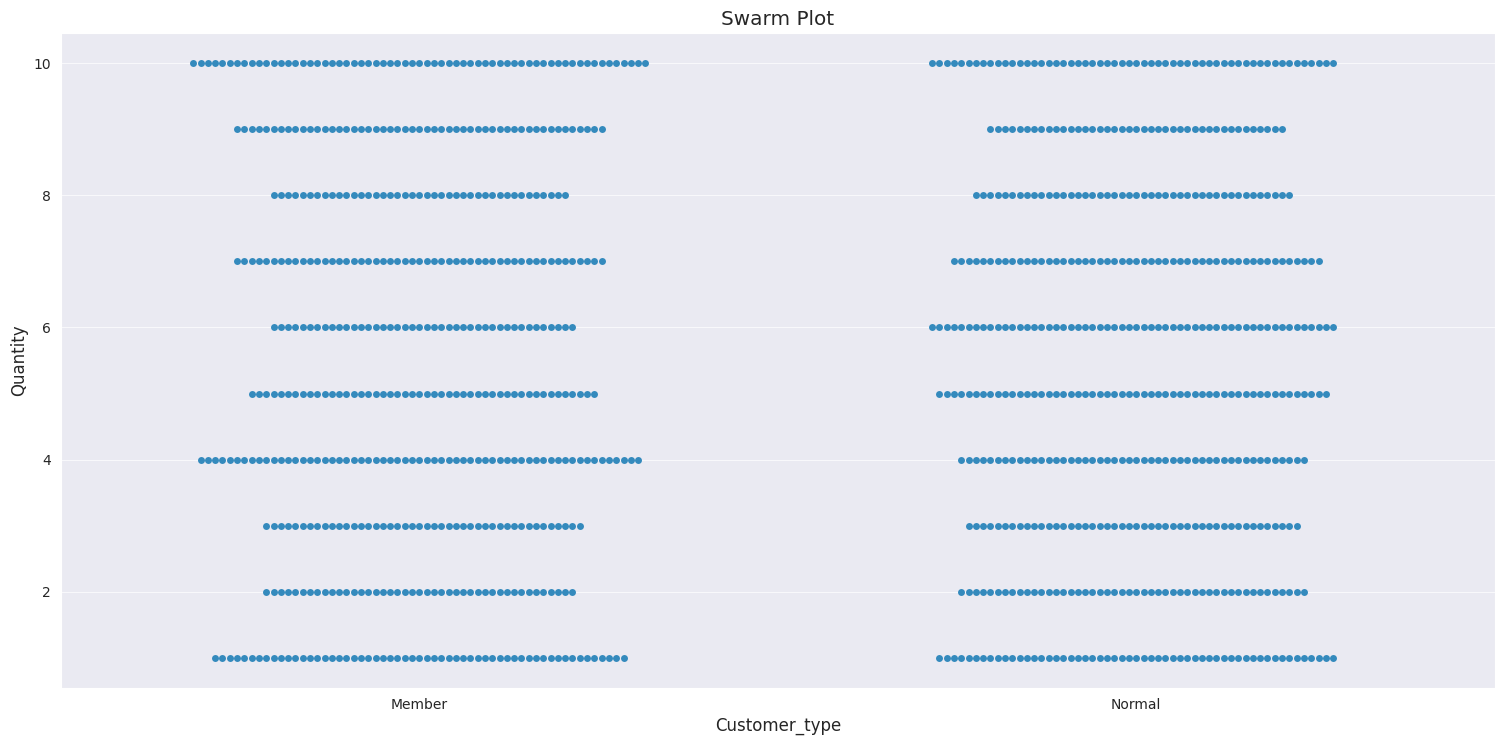

In [ ]:
#8.Plot the linear relationship between member customer, normal customer and quantity using swarm plot.
from matplotlib.figure import Figure
sns.set_style('darkgrid')
plt.figure(figsize=(18.5,8.5))
sns.swarmplot(x='Customer_type',y='Quantity',data=df0).set_title('Swarm Plot')

Text(0.5, 1.0, 'Strip Plot')

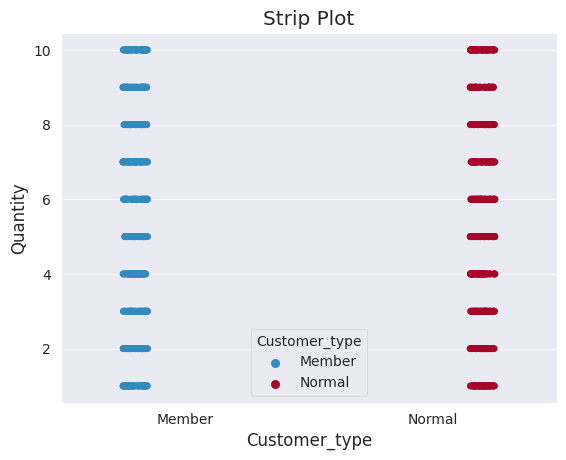

In [ ]:
#9.Plot the linear relationship between member customer, normal customer and quantity using strip plot.
sns.stripplot(x='Customer_type',y='Quantity',data=df0,jitter=True,hue='Customer_type',dodge=True).set_title('Strip Plot')

Text(0.5, 1.0, 'Violin Plot')

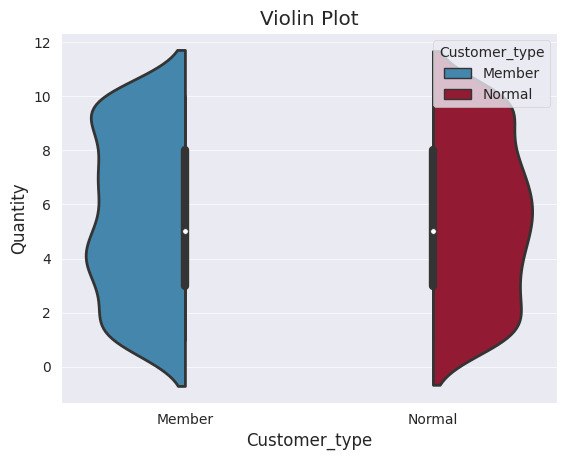

In [ ]:
#10.Plot the linear relationship between member customer, normal customer and quantity using Violinplot plot.
sns.violinplot(x='Customer_type',y='Quantity',data=df0,hue='Customer_type',split=True).set_title("Violin Plot")

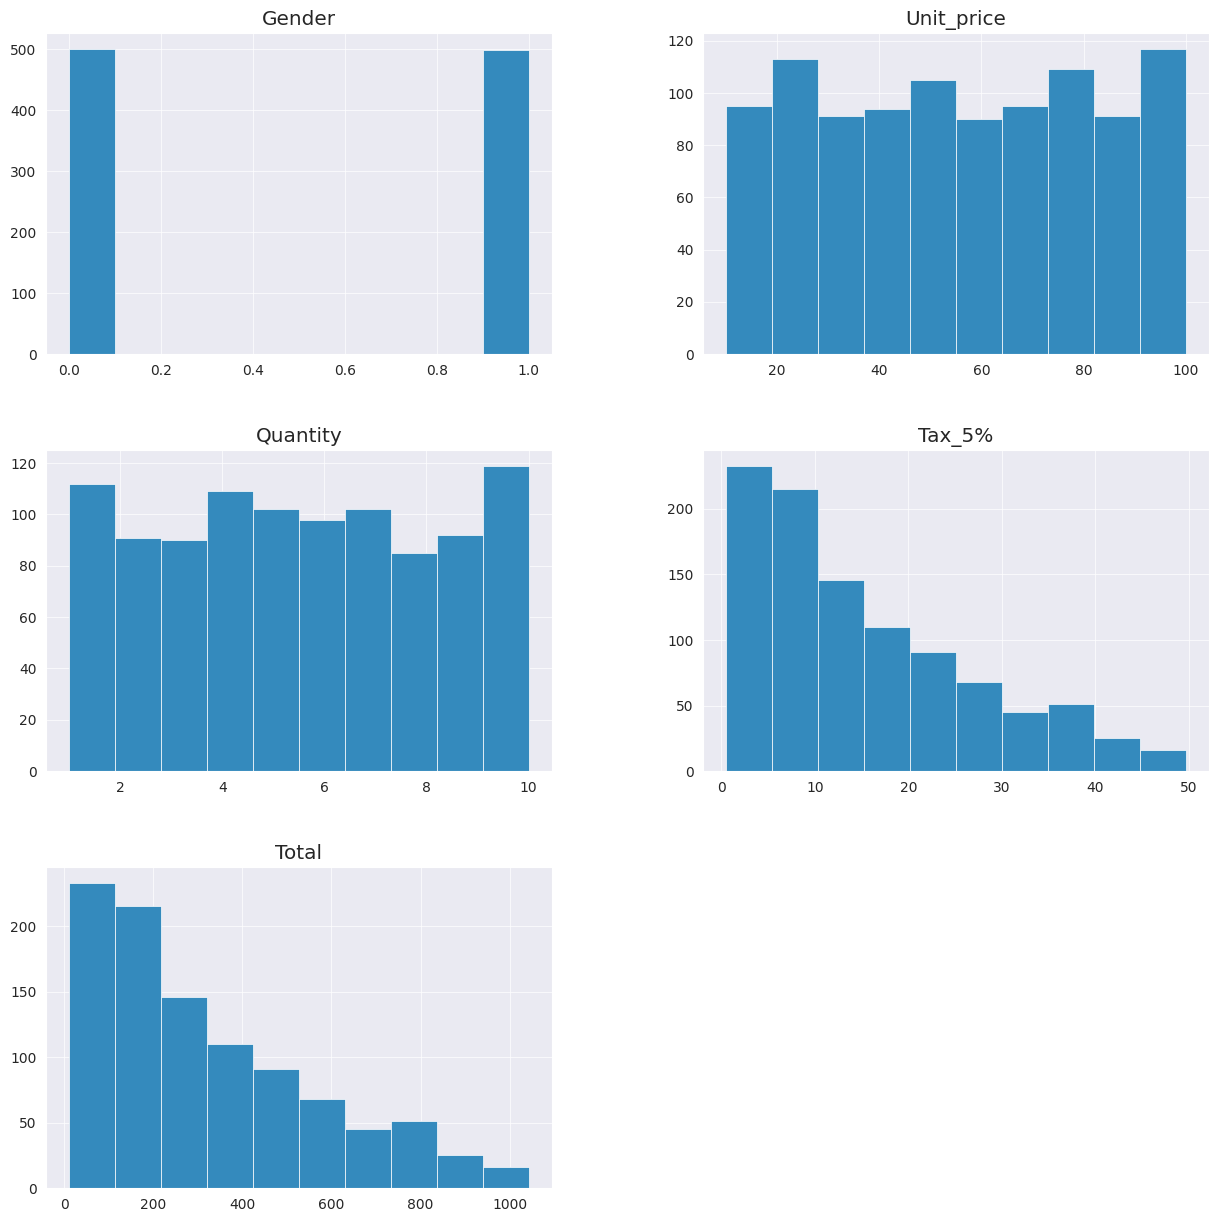

In [ ]:
#11.Plot the histogram of total column in the market dataset.
df0.hist(figsize=(15,15))
plt.show()

<ipython-input-26-cb26f7a0baeb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


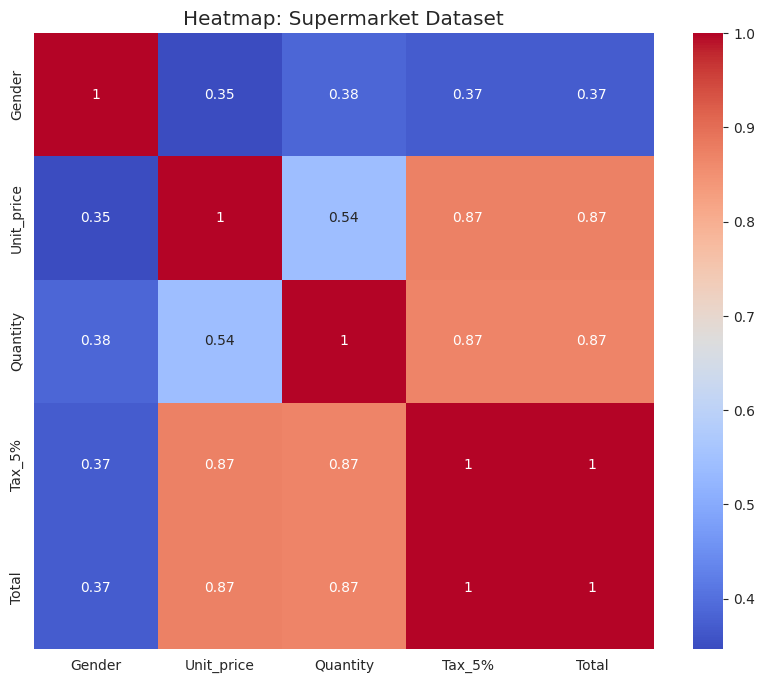

In [ ]:
#12.Plot the heat map super market dataset.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Supermarket Dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

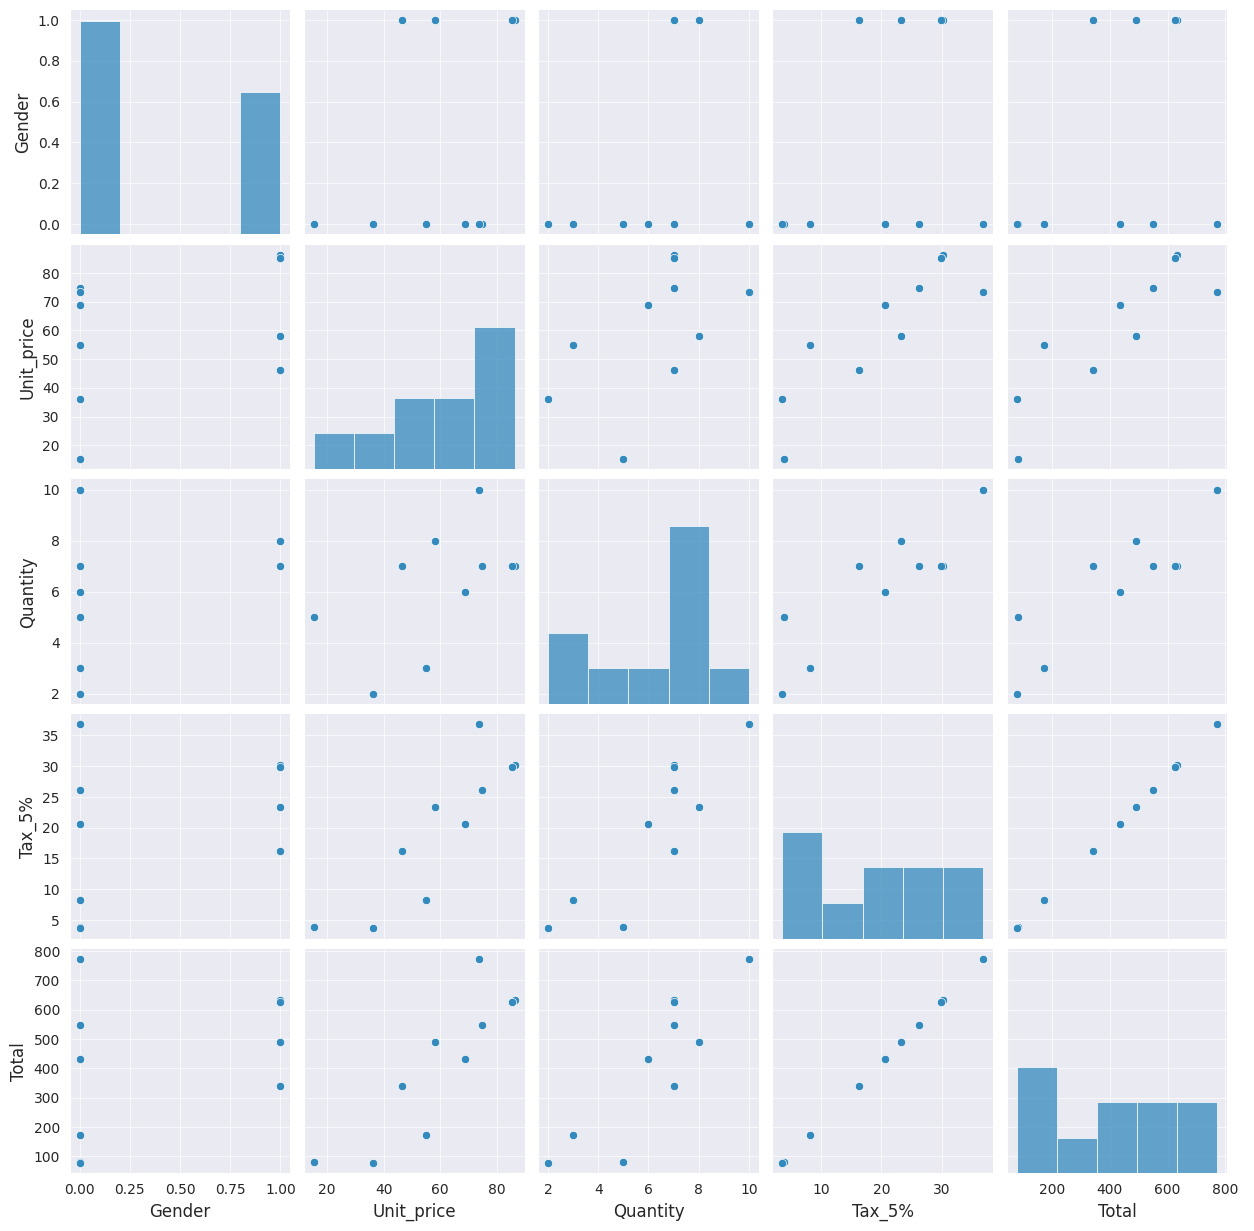

In [ ]:
#13.Plot the pair plot for the super market dataset.
g=sns.pairplot(df,palette='coolwarm')#palette : color style
g.add_legend()